<a href="https://colab.research.google.com/github/NjorogeMaurice/NSE_Analysis/blob/main/NSE_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NSE(Nairobi Security Exchange) stock data analysis

## INTRODUCTION

In the world of financial markets, data play a vital role to guide investors through the dynamics of stock performance. We embark on a data-driven journey through the unpredictable landscape of stock market.

In [1]:
## Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,mean_absolute_error, mean_squared_error, r2_score,make_scorer,roc_curve, auc
import seaborn as sns
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [84]:
stock_data=pd.read_csv("/content/drive/MyDrive/KnowledgeBase/NSE_data_all_stocks_2022_jan_to_may-edit2.csv")

In [112]:
stock_data.head(10)

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price,PriceMovement,Profit
0,3-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.60,11.90,11.75,11.85,-0.10,0.84%,NaN,-,0,0
1,4-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.70,11.85,11.80,11.75,0.05,0.43%,NaN,-,1,1
2,5-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.60,11.80,11.75,11.80,-0.05,0.42%,NaN,-,0,0
3,6-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.70,11.90,11.80,11.75,0.05,0.43%,NaN,-,1,1
4,7-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.60,11.95,11.80,11.80,0.00,-,NaN,-,0,0
5,10-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.75,11.95,11.90,11.80,0.10,0.85%,NaN,-,1,1
6,11-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.80,11.95,11.90,11.90,0.00,-,NaN,-,0,0
7,12-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.80,12.00,12.00,11.90,0.10,0.84%,NaN,-,1,1
8,13-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.70,12.00,11.80,12.00,-0.20,1.67%,NaN,-,0,0
9,14-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.75,11.90,11.85,11.80,0.05,0.42%,NaN,-,1,1


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            6732 non-null   object
 1   Code            6732 non-null   object
 2   Name            6732 non-null   object
 3   12m Low         6732 non-null   object
 4   12m High        6732 non-null   object
 5   Day Low         6732 non-null   object
 6   Day High        6732 non-null   object
 7   Day Price       6732 non-null   object
 8   Previous        6732 non-null   object
 9   Change          6732 non-null   object
 10  Change%         6732 non-null   object
 11  Volume          6732 non-null   object
 12  Adjusted Price  6732 non-null   object
dtypes: object(13)
memory usage: 683.8+ KB


In [7]:
stock_data.nunique()

Date               102
Code                66
Name                66
12m Low            148
12m High            87
Day Low           1159
Day High          1111
Day Price         1356
Previous          1354
Change             267
Change%            740
Volume            1577
Adjusted Price      45
dtype: int64

In [3]:
## capture all companies
all_companies=stock_data['Name'].unique()
all_company_codes=stock_data['Code'].unique()

In [85]:
## converting string data to float

stock_data['Previous'] = stock_data['Previous'].str.replace(',', '').astype(float)
stock_data['12m Low'] = stock_data['12m Low'].str.replace(',', '').astype(float)
stock_data['12m High'] = stock_data['12m High'].str.replace(',', '').astype(float)
stock_data['Day Low'] = stock_data['Day Low'].str.replace(',', '').astype(float)
stock_data['Day High'] = stock_data['Day High'].str.replace(',', '').astype(float)
stock_data['Day Price'] = stock_data['Day Price'].str.replace(',', '').astype(float)
stock_data['Volume'] = pd.to_numeric(stock_data['Volume'],errors='coerce')
stock_data['Change'] = pd.to_numeric(stock_data['Change'],errors='coerce')
stock_data['Change'].fillna(0, inplace=True)

## ACT 1. Resilience of each company over the past 12 months.

Our focus is on the '12m Low' and '12m High' columns. These two features reveal the resilience of the companies over the past 12 months

In [86]:
past_12m = stock_data[['12m High','12m Low','Code']]

By calculating the gap between the two columns, we can identify the companies with high stability: those who have managed to maintain their value. The smaller the gap, the more stable the company is

In [87]:
diff_high_low = []

In [88]:
# Obtain the '12m High', '12m Low' and 'Code' for each company
for company in all_companies:
  company_data = stock_data[stock_data['Name'] == company]
  past_12m = company_data[['Name','12m High','12m Low','Code']]
  diff_high_low.append(past_12m.groupby('Code').first())

In [89]:
# Calculate the difference between the '12m High' and '12m Low' for each company

for i in range(len(diff_high_low)):
  diff_high_low[i]['diff'] = diff_high_low[i]['12m High'].values - diff_high_low[i]['12m Low'].values

In [90]:
# Output Example
diff_high_low[0]

,Name,12m High,12m Low,diff
Code,,,,
ABSA,ABSA Bank Kenya Plc,12.95,8.6,4.35


In [91]:
diff_high_low_df = pd.concat(diff_high_low)

In [92]:
diff_high_low_df.head()

,Name,12m High,12m Low,diff
Code,,,,
ABSA,ABSA Bank Kenya Plc,12.95,8.60,4.35
GLD,ABSA NewGold ETF,2135.00,1780.00,355.00
ARM,ARM Cement Plc,5.55,5.55,0.00
BAMB,Bamburi Cement Ltd,42.00,33.00,9.00
BKG,BK Group Plc,40.00,24.30,15.70


<Axes: title={'center': 'diff'}, xlabel='Code'>

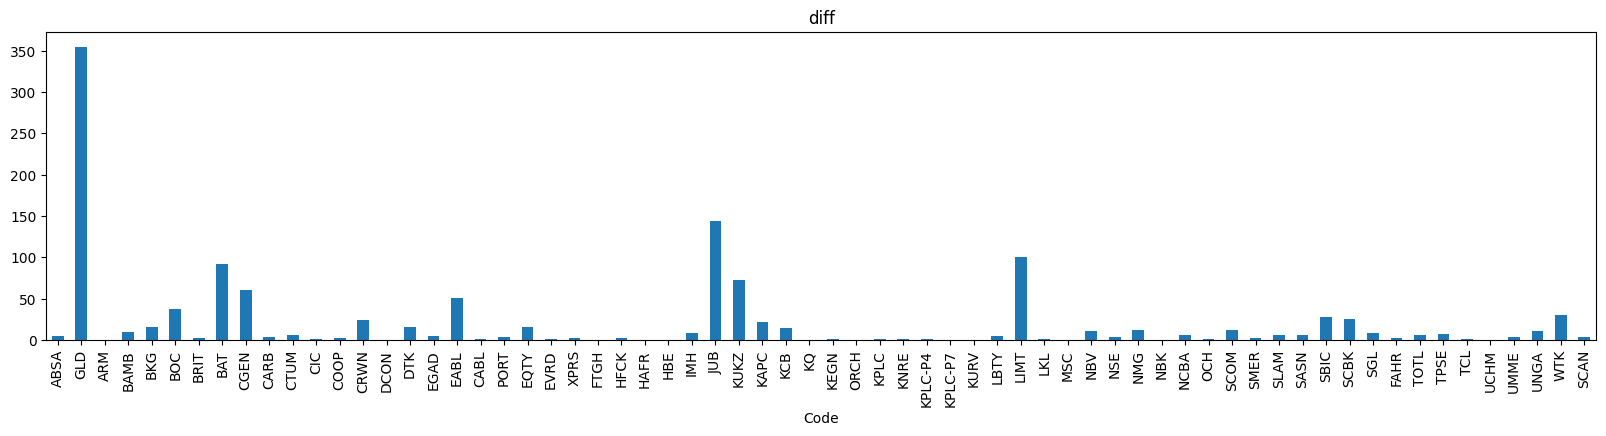

In [78]:
# bar plot displaying the 'diff' values of all companies
diff_high_low_df['diff'].plot(kind='bar', figsize=(20, 4), title='diff')

In [55]:
# Top 10: Those with smallest difference
top_10 = diff_high_low_df.sort_values(by=['diff']).head(10)
top_10

,Name,12m High,12m Low,diff
Code,,,,
KQ,Kenya Airways Plc,3.83,3.83,0.00
ORCH,Kenya Orchards Ltd,10.40,10.40,0.00
KPLC-P7,KPLC-P7,6.00,6.00,0.00
DCON,Deacons (East Africa) Plc,0.45,0.45,0.00
HBE,Homeboyz Entertainment Plc,4.66,4.66,0.00
MSC,Mumias Sugar Company Ltd,0.27,0.27,0.00
NBK,National Bank of Kenya Ltd,4.12,4.12,0.00
KURV,Kurwitu Ventures Ltd,1500.00,1500.00,0.00
ARM,ARM Cement Plc,5.55,5.55,0.00


In [56]:
# Bottom 10: Those with smallest difference
bottom_10 = diff_high_low_df.sort_values(by=['diff']).tail(10)
bottom_10

,Name,12m High,12m Low,diff
Code,,,,
SBIC,Stanbic Holdings Plc,106.00,78.0,28.00
WTK,Williamson Tea Kenya Plc,154.75,125.0,29.75
BOC,BOC Kenya Plc,98.00,61.0,37.00
EABL,East African Breweries Ltd,194.00,143.5,50.50
CGEN,Car and General (K) Ltd,70.00,10.0,60.00
KUKZ,Kakuzi Plc,427.00,355.0,72.00
BAT,British American Tobacco Kenya Plc,512.00,420.0,92.00
LIMT,Limuru Tea Plc,360.00,260.0,100.00
JUB,Jubilee Holdings Ltd,392.00,248.0,144.00


In [94]:
stock_data_1 = stock_data.copy()
stock_data_1['diff'] = diff_high_low_df['diff']


## ACT 2: Daily Price fluctuations

Next, let's shift our focus to the daily price fluctuations. Here, our interest is on the "Day Low" and "Day High" columns. By analyzing the spread between these values, we can measure the volatility level within each company. Are there companies experiencing dramatic swings, hinting at potential short-term gains (or losses) for active traders?

In [65]:
daily_price = stock_data[['Day Low','Day High','Code']]

In [66]:
print(daily_price)

      Day Low  Day High  Code
0       11.60     11.90  ABSA
1       11.70     11.85  ABSA
2       11.60     11.80  ABSA
3       11.70     11.90  ABSA
4       11.60     11.95  ABSA
...       ...       ...   ...
6727     2.95      3.00  SCAN
6728     2.94      3.00  SCAN
6729     2.95      3.00  SCAN
6730     2.98      3.00  SCAN
6731     2.98      3.10  SCAN

[6732 rows x 3 columns]


We move on to visualize daily flunctuations of the top 10 and bottom 10, from the previous ACT(ACT I)

In [61]:
top_10_codes = top_10['Name'].values
bottom_10_codes = bottom_10['Name'].values

In [60]:
top_10_codes

array(['Kenya Airways Plc', 'Kenya Orchards Ltd', 'KPLC-P7',
       'Deacons (East Africa) Plc', 'Homeboyz Entertainment Plc',
       'Mumias Sugar Company Ltd', 'National Bank of Kenya Ltd',
       'Kurwitu Ventures Ltd', 'ARM Cement Plc', 'Uchumi Supermarket Plc'],
      dtype=object)

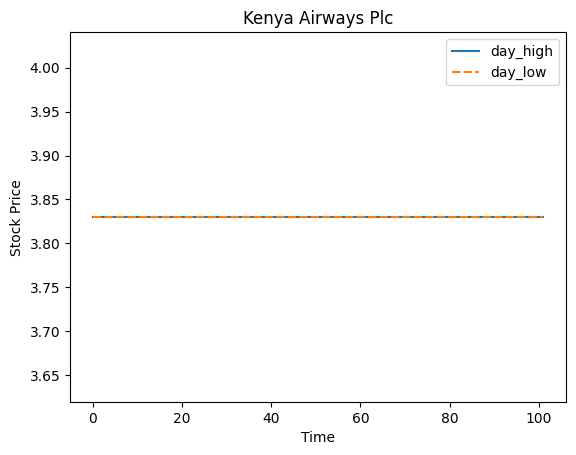

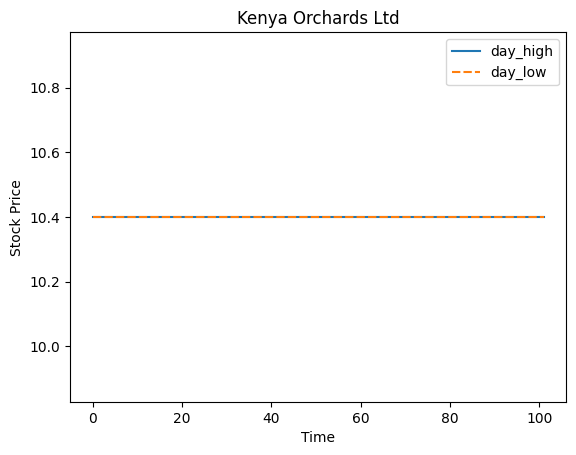

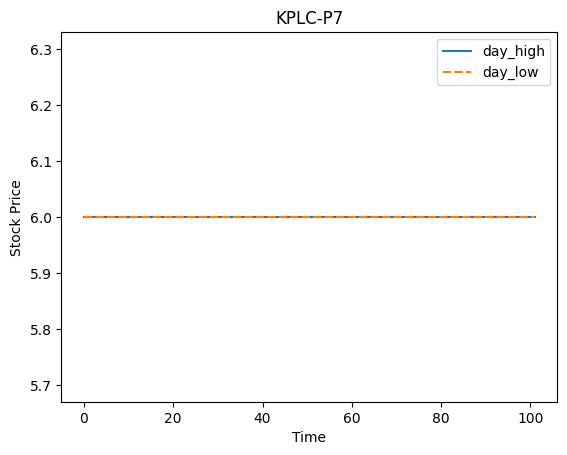

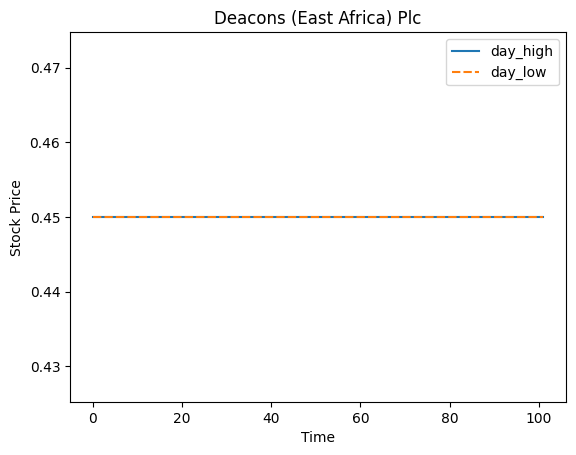

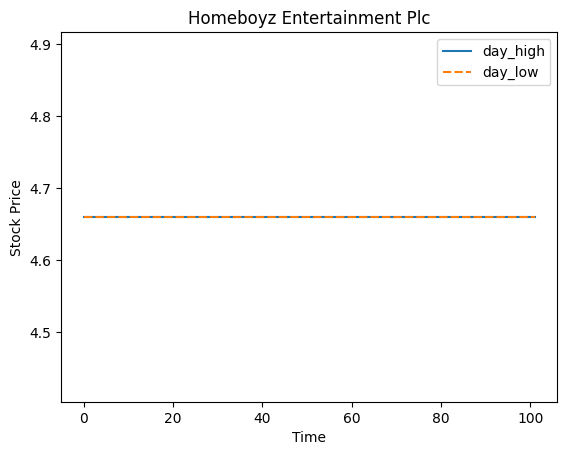

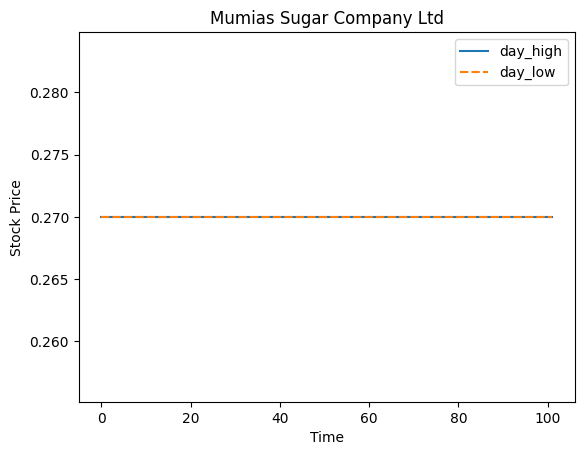

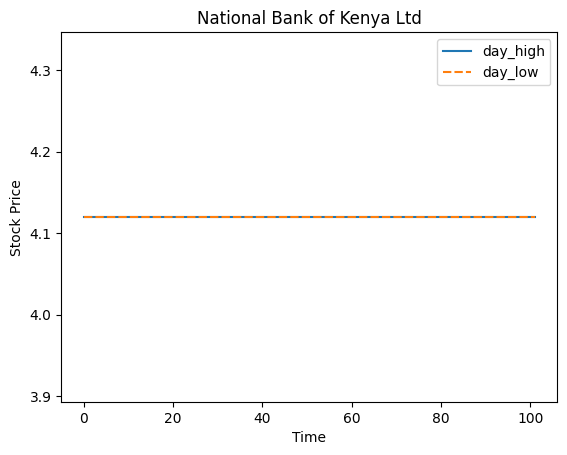

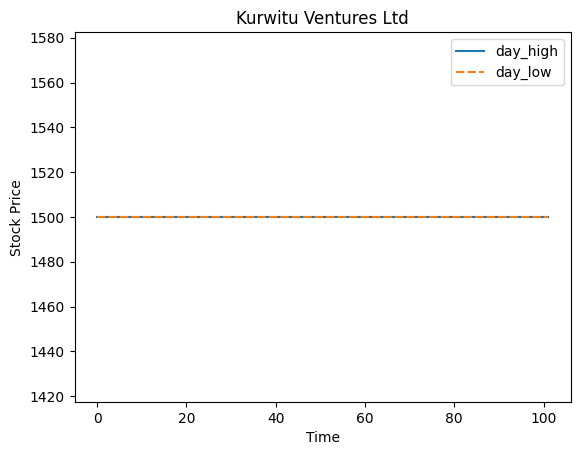

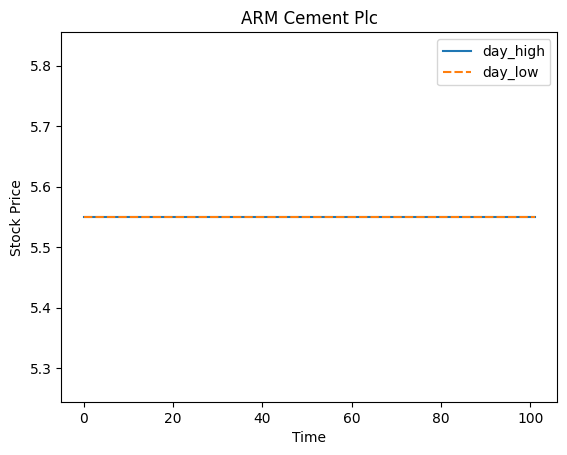

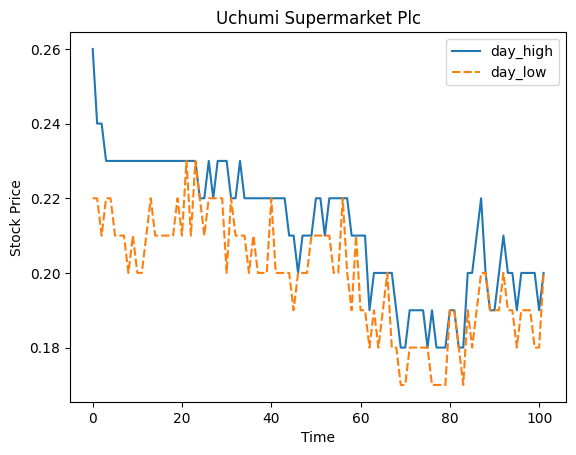

In [63]:
for company in top_10_codes:
  company_data = stock_data[stock_data['Name'] == company].reset_index(drop=True)
  day_high = company_data['Day High']
  day_low = company_data['Day Low']
  date = company_data['Date']

  data = pd.DataFrame({'day_high':day_high,'day_low':day_low,'date':date})
  sns.lineplot(data=data)
  plt.title(company)
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.show()

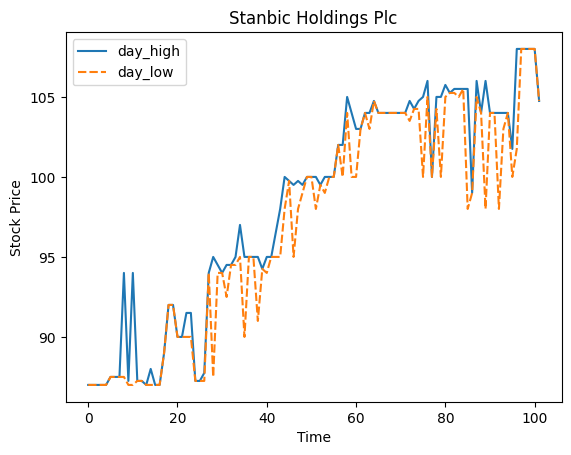

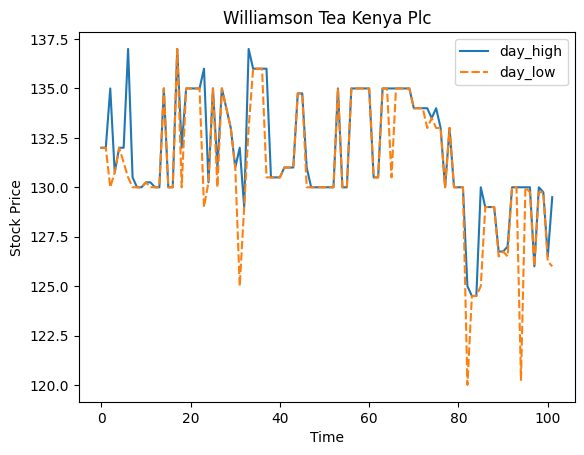

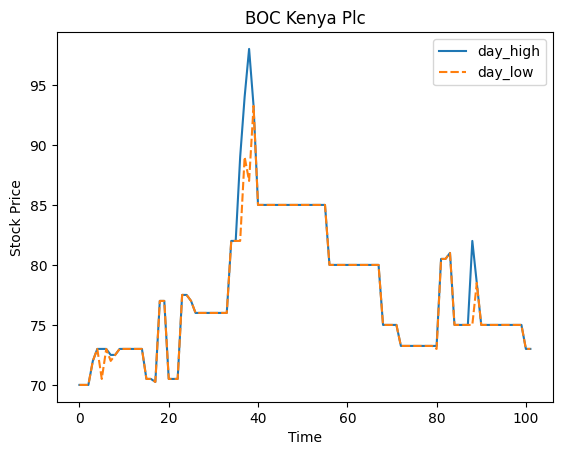

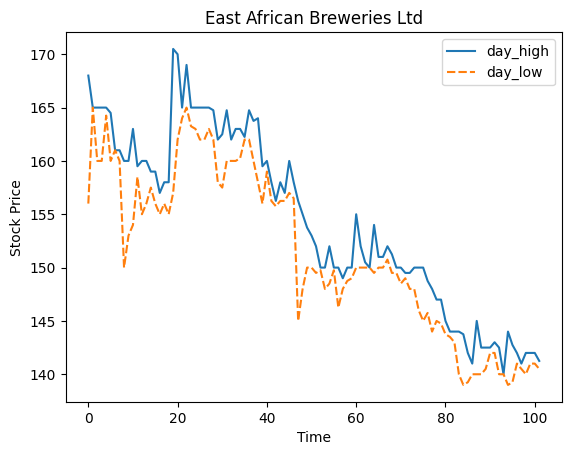

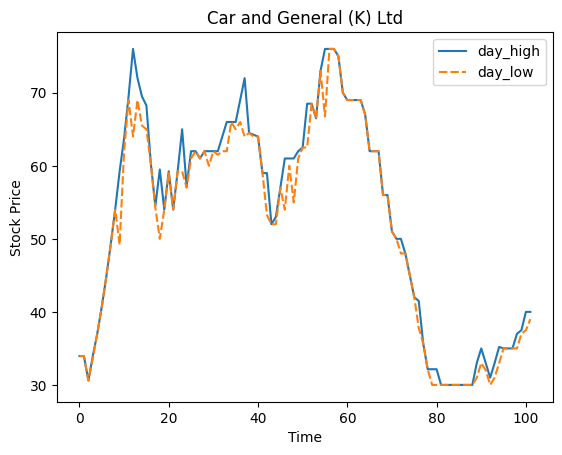

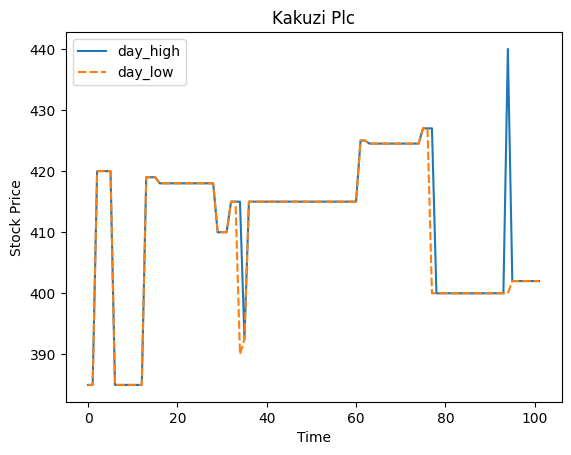

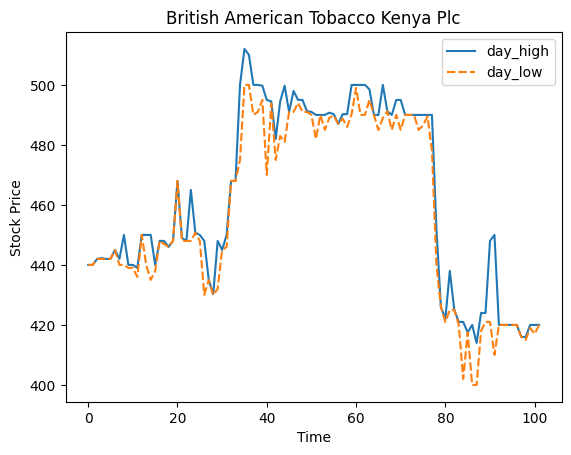

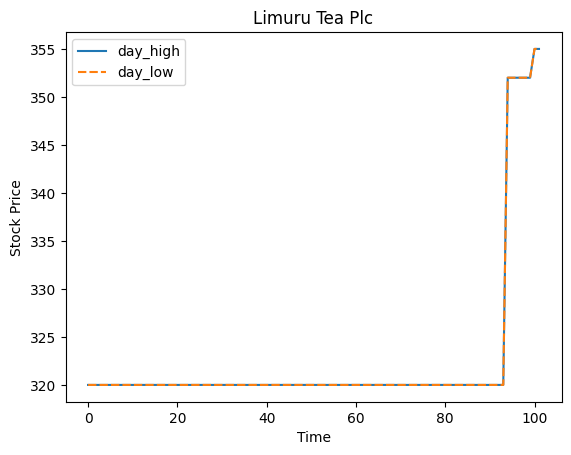

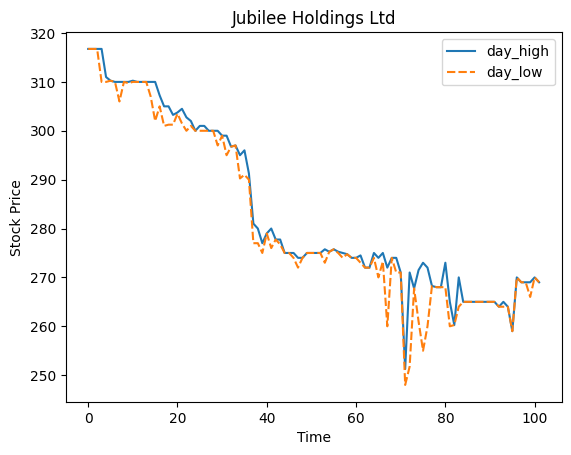

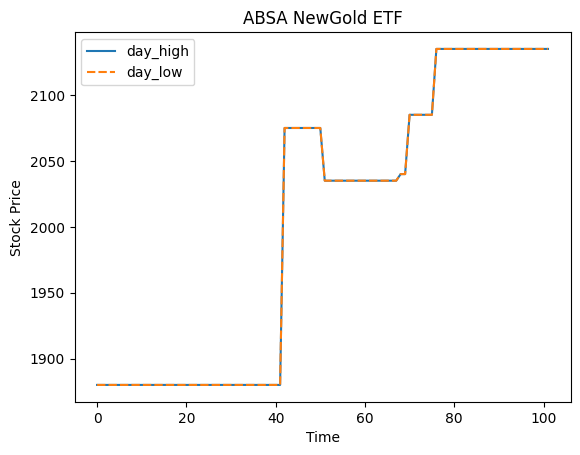

In [64]:
for company in bottom_10_codes:
  company_data = stock_data[stock_data['Name'] == company].reset_index(drop=True)
  day_high = company_data['Day High']
  day_low = company_data['Day Low']
  date = company_data['Date']

  data = pd.DataFrame({'day_high':day_high,'day_low':day_low,'date':date})
  sns.lineplot(data=data)
  plt.title(company)
  plt.xlabel('Time')
  plt.ylabel('Stock Price')
  plt.show()

From the results above, it is evident that the top 10 companies have low daily flunctuations compared to the botton 10.

This reveals a direct relationship between the 'diff' and 'daily flunctuations'.

## Change: Difference between 'Day Price' and 'Previous' price

Another interesting feature is the 'Change' column. It gets the difference between the 'Day Price' and 'Previous' features: The 'Day Price' of a company is compared with its price of 'Previous' day.


In [80]:
## 'Change' feature compares the 'Day Price' and 'Previous' features. It gets the difference
stock_data['Change'] = pd.to_numeric(stock_data['Change'],errors='coerce')
stock_data['Change'].fillna(0, inplace=True)
stock_data['Volume'].fillna(0, inplace=True)

In [ ]:
stock_data.head()

,Date,Code,Name,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjusted Price
0,3-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.9,11.75,11.85,-0.10,0.84%,"57,700",-
1,4-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.7,11.85,11.8,11.75,0.05,0.43%,"86,600",-
2,5-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.8,11.75,11.8,-0.05,0.42%,"72,800",-
3,6-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.7,11.9,11.8,11.75,0.05,0.43%,"128,900",-
4,7-Jan-22,ABSA,ABSA Bank Kenya Plc,8.6,12.95,11.6,11.95,11.8,11.8,0.00,-,"202,600",-


### Significance of 'Change'

In this section, we build two linear regression models to predict 'Daily Price'. We use 'Previous', '12m Low', '12m High', 'Day Low' and 'Day High' features in both models. However we include 'Change' feature in training one model

In [96]:
stock_data_1['diff'].fillna(0, inplace=True)


 Model for ABSA Bank Kenya Plc:
Without 'Change' feature
MSE (Train): 0.006775969626503138
MSE (Test): 0.01037442313154557 

With 'Change' feature
MSE (Train1): 8.18077975784753e-31
MSE (Test1): 2.4041475206735597e-30 



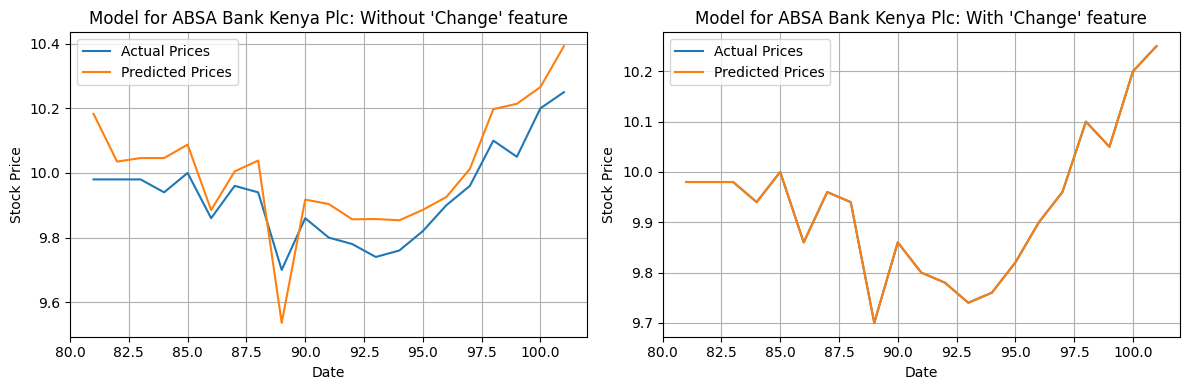


 Model for ABSA NewGold ETF:
Without 'Change' feature
MSE (Train): 0.0
MSE (Test): 0.0 

With 'Change' feature
MSE (Train1): 0.0
MSE (Test1): 0.0 



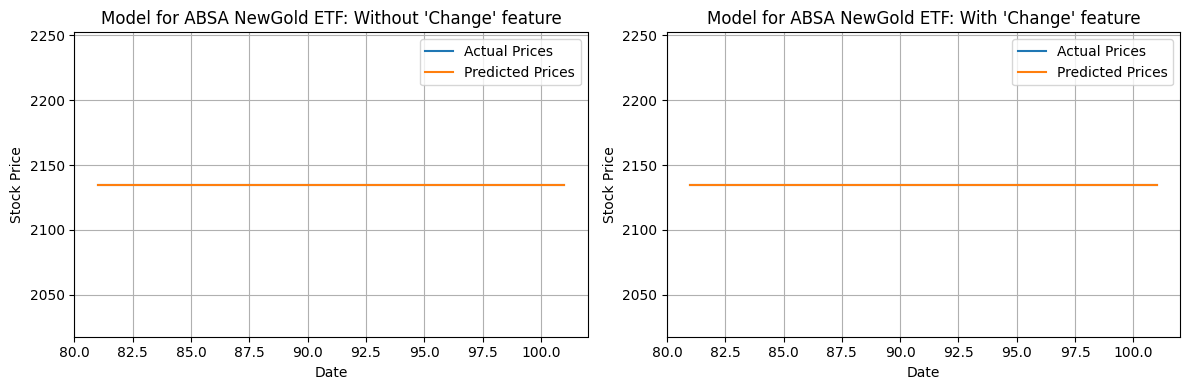


 Model for ARM Cement Plc:
Without 'Change' feature
MSE (Train): 7.888609052210118e-31
MSE (Test): 7.888609052210118e-31 

With 'Change' feature
MSE (Train1): 7.888609052210118e-31
MSE (Test1): 7.888609052210118e-31 



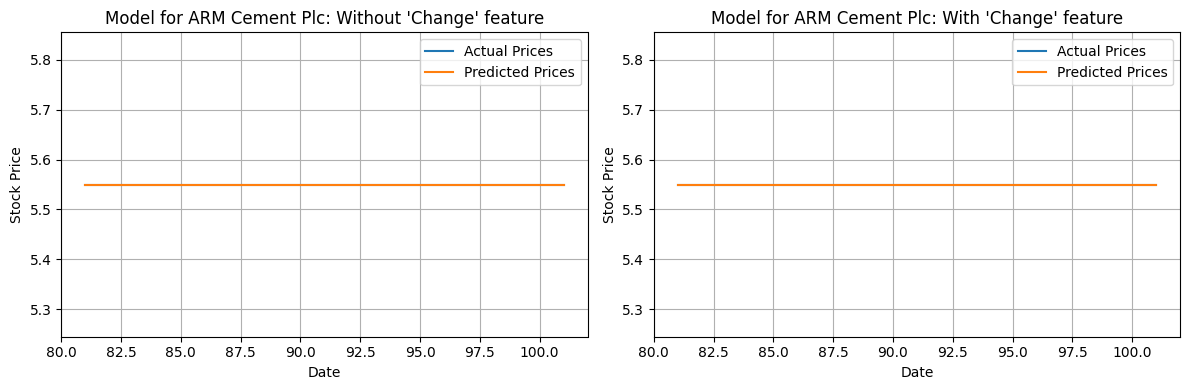


 Model for Bamburi Cement Ltd:
Without 'Change' feature
MSE (Train): 0.033770771654834005
MSE (Test): 0.09265568386479066 

With 'Change' feature
MSE (Train1): 7.479570064317741e-30
MSE (Test1): 1.9233180165388477e-29 



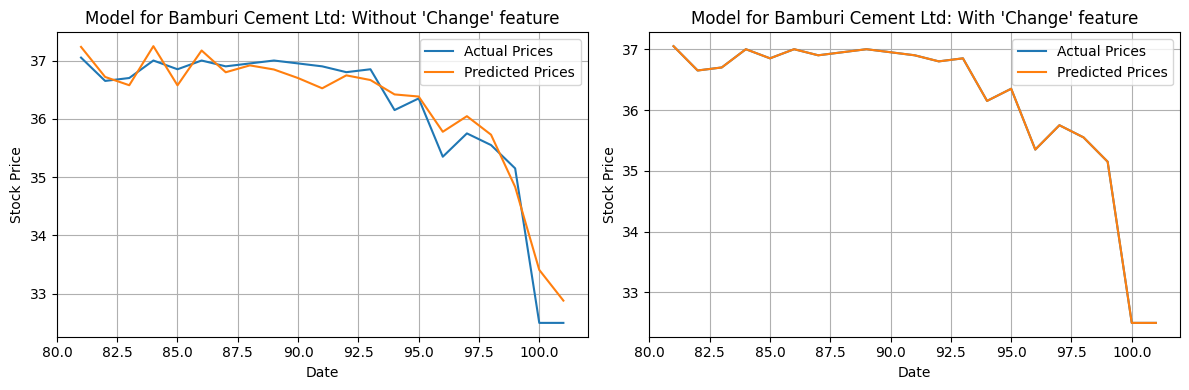


 Model for BK Group Plc:
Without 'Change' feature
MSE (Train): 0.011392676213879706
MSE (Test): 0.010159665071540596 

With 'Change' feature
MSE (Train1): 3.8956094084988235e-30
MSE (Test1): 2.4041475206735597e-30 



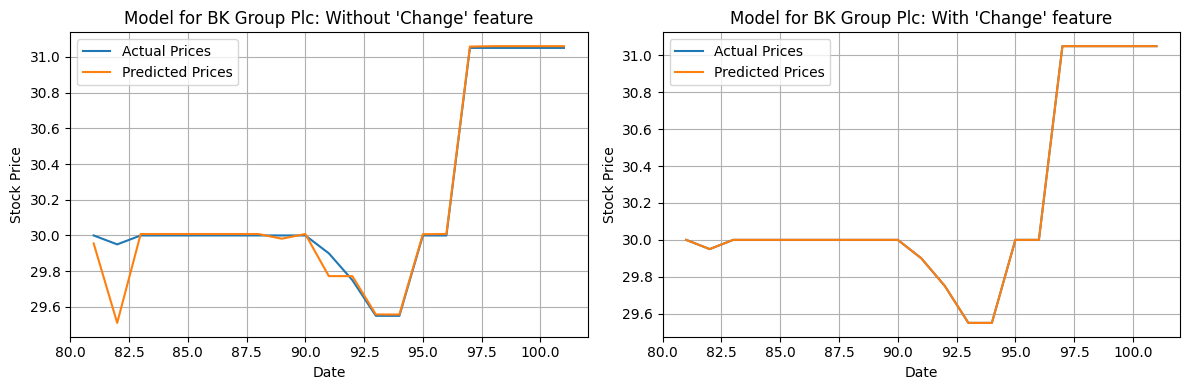

In [104]:
for company in all_companies[:5]:
    company_stock_data = stock_data_1[stock_data['Name'] == company]


    # Use the 'Previous_Price','12m Low', '12m High', 'Day Low', 'Day High', 'Change' as the features
    X = company_stock_data[['Previous','12m Low', '12m High', 'Day Low', 'Day High']]
    X1 = company_stock_data[['Previous','12m Low', '12m High', 'Day Low', 'Day High','Change']]
    y = company_stock_data['Day Price']


    # Split data into training and testing sets
    split = int(0.8 * len(company_stock_data))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]

    X_train1, y_train1 = X1[:split], y[:split]
    X_test1, y_test1 = X1[split:], y[split:]

    # Train the model - Linear Regression
    model = LinearRegression()
    model1 = LinearRegression()

    # Scaling our dataset
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_train1 = scaler.fit_transform(X_train1)
    X_test1 = scaler.transform(X_test1)

    model.fit(X_train, y_train)
    model1.fit(X_train1, y_train1)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    y_pred_train1 = model1.predict(X_train1)
    y_pred_test1 = model1.predict(X_test1)

    # Evaluate Model Performance
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    mse_train1 = mean_squared_error(y_train1, y_pred_train1)
    mse_test1 = mean_squared_error(y_test1, y_pred_test1)

    print(f'\n Model for {company}:')

    print("Without 'Change' feature")
    print(f'MSE (Train): {mse_train}')
    print(f'MSE (Test): {mse_test} \n')

    print("With 'Change' feature")
    print(f'MSE (Train1): {mse_train1}')
    print(f'MSE (Test1): {mse_test1} \n')


    company_stock_data = company_stock_data.reset_index()

    # Create subplots
    plt.figure(figsize=(12, 4))  # Adjust the figure size as needed

    # Plot the first graph
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
    plt.plot(company_stock_data[-len(y_pred_test):].index,y_test,label='Actual Prices')
    plt.plot(company_stock_data[-len(y_pred_test):].index, y_pred_test,label='Predicted Prices')
    plt.title(f"Model for {company}: Without 'Change' feature")
    plt.legend()
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')

    # Plot the second graph
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
    plt.plot(company_stock_data[-len(y_pred_test1):].index,y_test1,label='Actual Prices')
    plt.plot(company_stock_data[-len(y_pred_test1):].index, y_pred_test1,label='Predicted Prices')
    plt.title(f"Model for {company}: With 'Change' feature")
    plt.legend()
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Stock Price')

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

From the results, it is observed that the model with the 'Change' feature outperformed the model training without the feature. **But why?**

The inclusion of "Change" imbues our model with a form of memory. It can not only analyze the current price but also learn from the immediate past. This historical context is crucial for navigating the often-volatile stock market landscape.

## Out of the box: Classification Problem

We move a step ahead to solve a classification problem:
To predict whether a company will gain profit or not(binary classification).

In this case, we create a new feature 'Price Movement'. It contains a 0, when the value of 'Change' is negative and 1 when value of 'Change' is positive.

We do a comparison of two models: RandomForest and SVM



In [105]:
## 'Change' feature compares the 'Day Price' and 'Previous' features. It gets the difference

stock_data['Change'] = pd.to_numeric(stock_data['Change'],errors='coerce')
stock_data['Change'].fillna(0, inplace=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         7

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



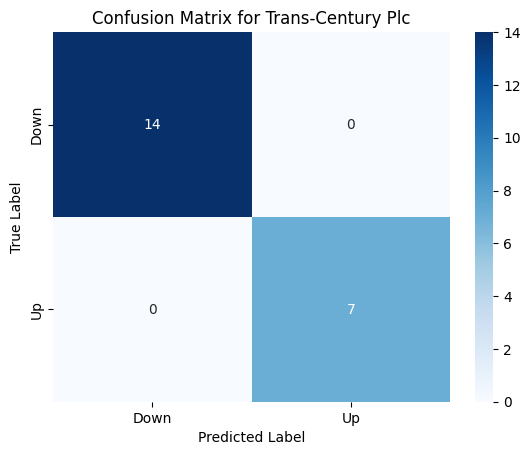


 Cross Validation for  Trans-Century Plc
Cross-Validation Scores: [1. 1. 1. 1.]
Mean Accuracy: 1.0
Max Accuracy: 1.0





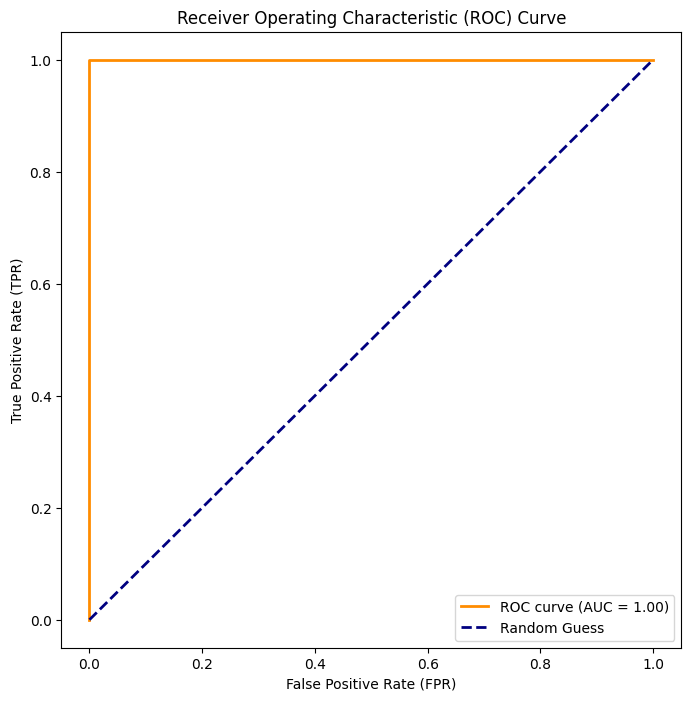

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         7

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



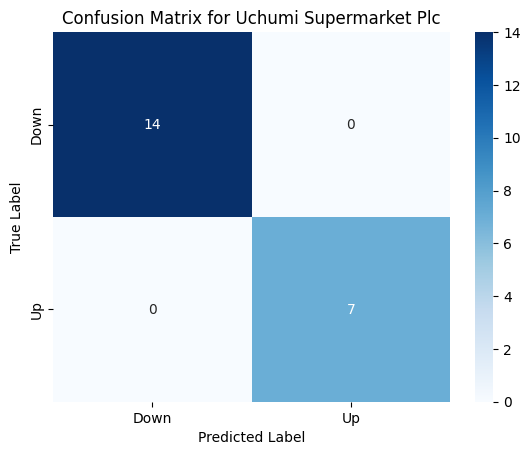


 Cross Validation for  Uchumi Supermarket Plc
Cross-Validation Scores: [1. 1. 1. 1.]
Mean Accuracy: 1.0
Max Accuracy: 1.0





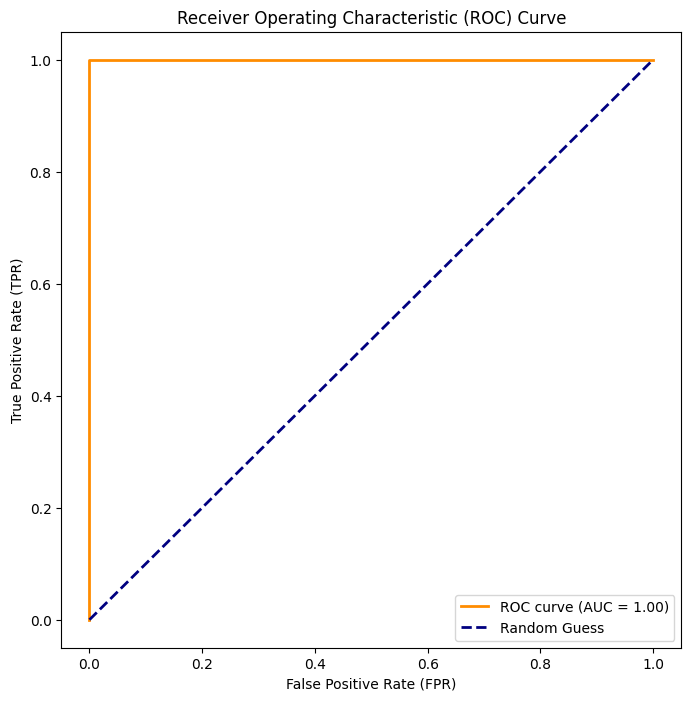

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



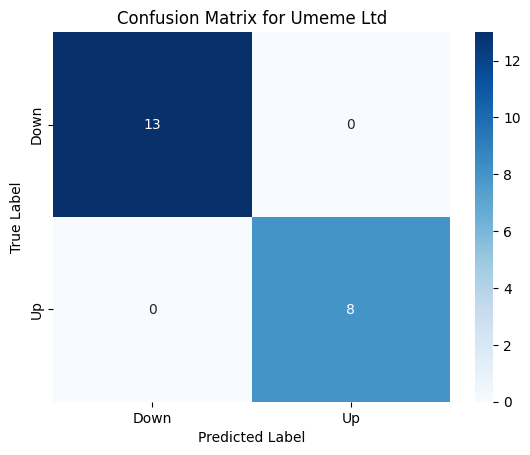


 Cross Validation for  Umeme Ltd
Cross-Validation Scores: [1. 1. 1. 1.]
Mean Accuracy: 1.0
Max Accuracy: 1.0





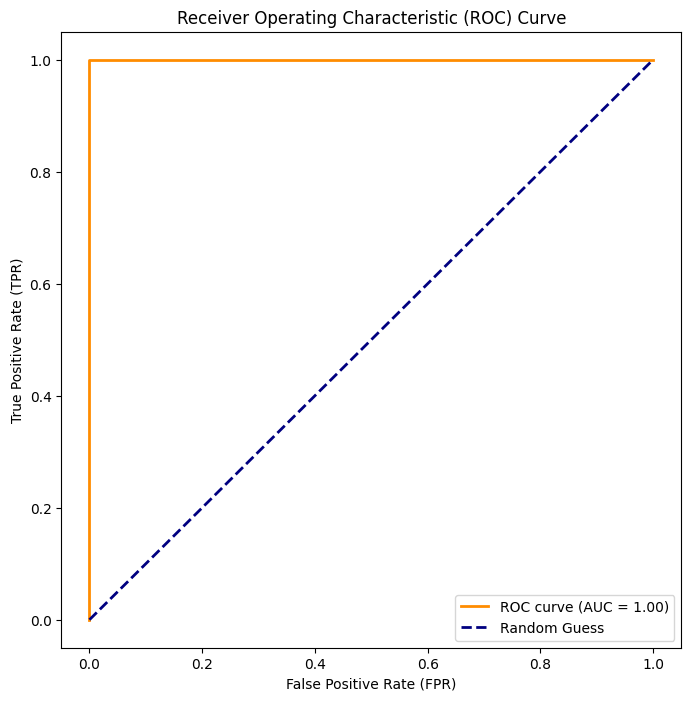

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



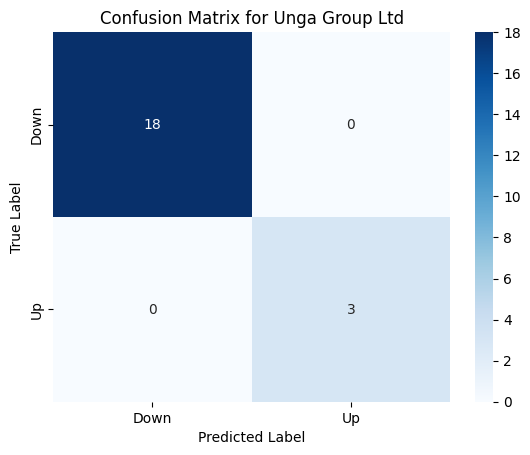


 Cross Validation for  Unga Group Ltd
Cross-Validation Scores: [0.96153846 1.         1.         1.        ]
Mean Accuracy: 0.9903846153846154
Max Accuracy: 1.0





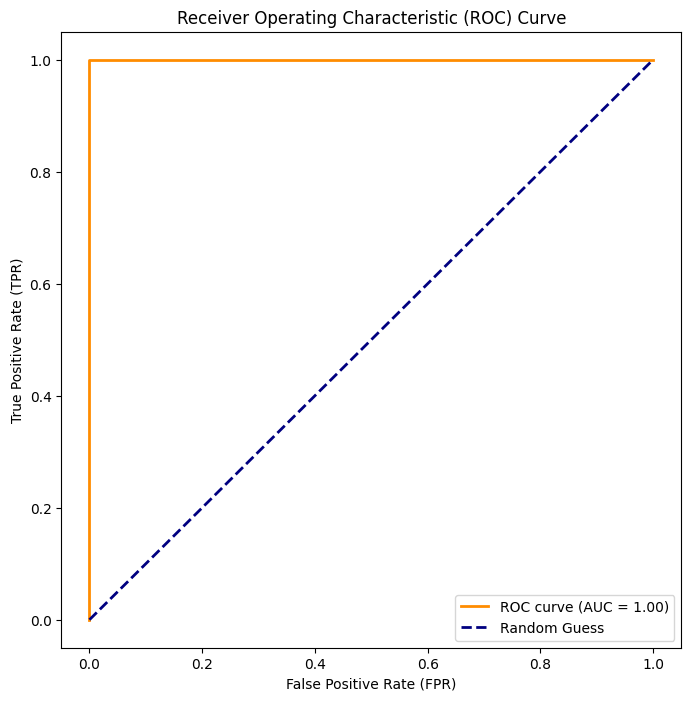

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



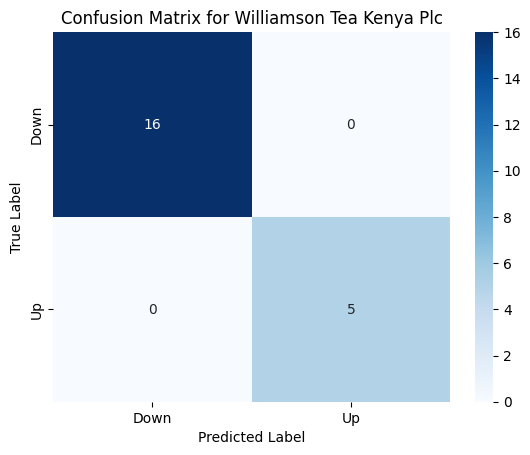


 Cross Validation for  Williamson Tea Kenya Plc
Cross-Validation Scores: [0.96153846 1.         1.         1.        ]
Mean Accuracy: 0.9903846153846154
Max Accuracy: 1.0





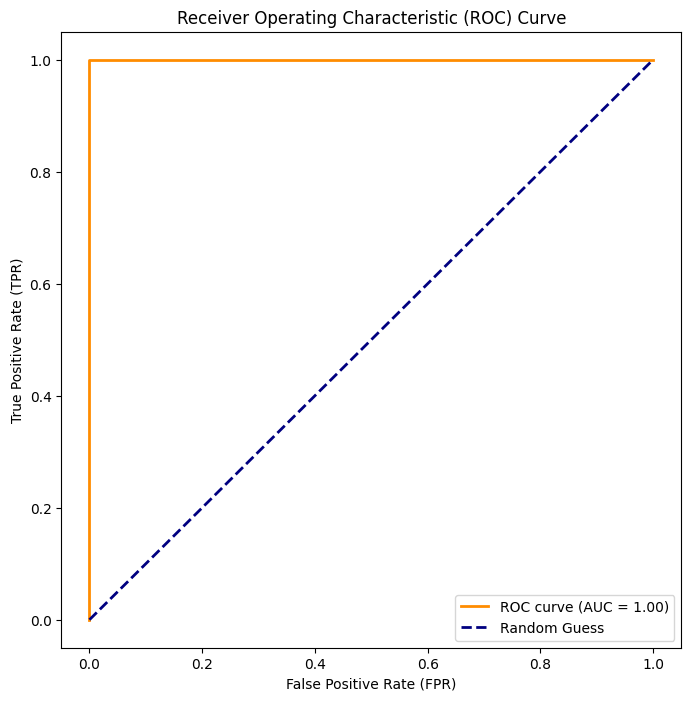

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



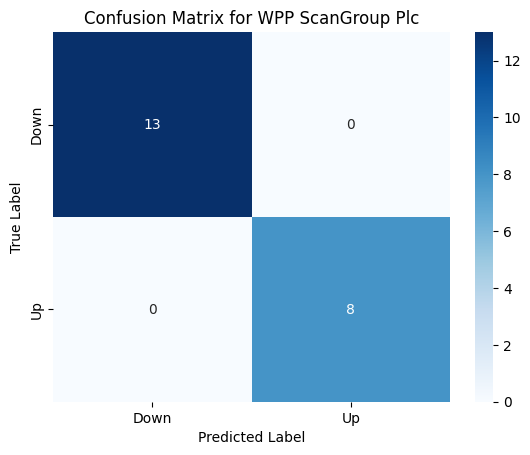


 Cross Validation for  WPP ScanGroup Plc
Cross-Validation Scores: [1. 1. 1. 1.]
Mean Accuracy: 1.0
Max Accuracy: 1.0





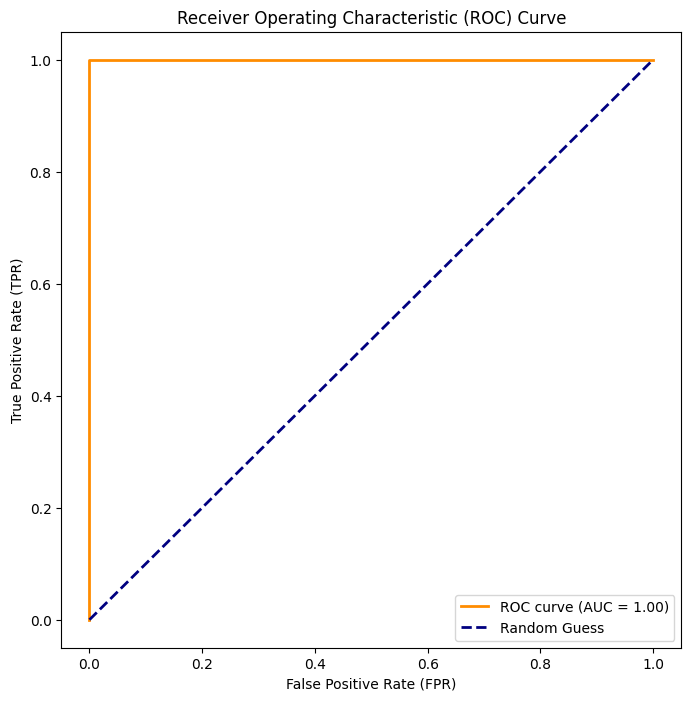

In [107]:
rf_accuracy=[]
stock_data['Change'] = pd.to_numeric(stock_data['Change'],errors='coerce')
stock_data.loc[:,'PriceMovement'] = (stock_data['Change']>0).astype(int)

for company in all_companies[60:]:
    company_data = stock_data[stock_data['Name'] == company]

    # Features
    X = company_data[['Previous','12m Low', '12m High', 'Day Low', 'Day High','Change']]
    y = company_data['PriceMovement']

    # Split data into training and testing sets
    split = int(0.8 * len(company_data))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]

    # Initialize and train Random Forest Classifier
    rf_classifier = RandomForestClassifier(random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    rf_classifier.fit(X_train, y_train)

    y_test = y_test.astype(int)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)

    # Evaluate Model Performance
    accuracy = accuracy_score(y_test, y_pred)
    rf_accuracy.append(accuracy)

    ## classification report
    print(classification_report(y_test, y_pred))

    ## confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
    plt.title('Confusion Matrix for {comp}'.format(comp=company))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    ## cross validation, using 4 folds
    stratified_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    cv_scores = cross_val_score(rf_classifier, X, y, cv=stratified_cv, scoring=make_scorer(accuracy_score))
    # Display cross-validation scores
    print("\n Cross Validation for ",company)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", cv_scores.mean())
    print("Max Accuracy:", max(cv_scores))
    print("\n\n")

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92         7

    accuracy                           0.95        21
   macro avg       0.97      0.93      0.94        21
weighted avg       0.96      0.95      0.95        21



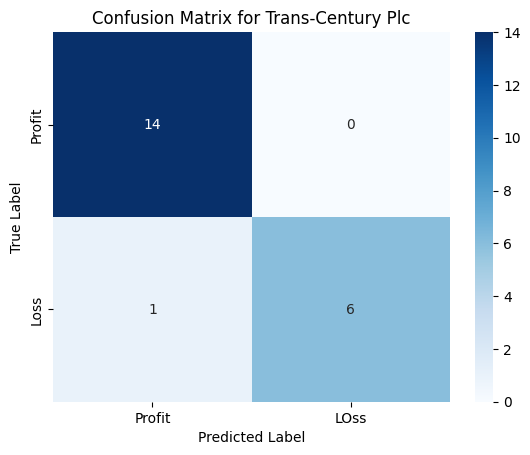

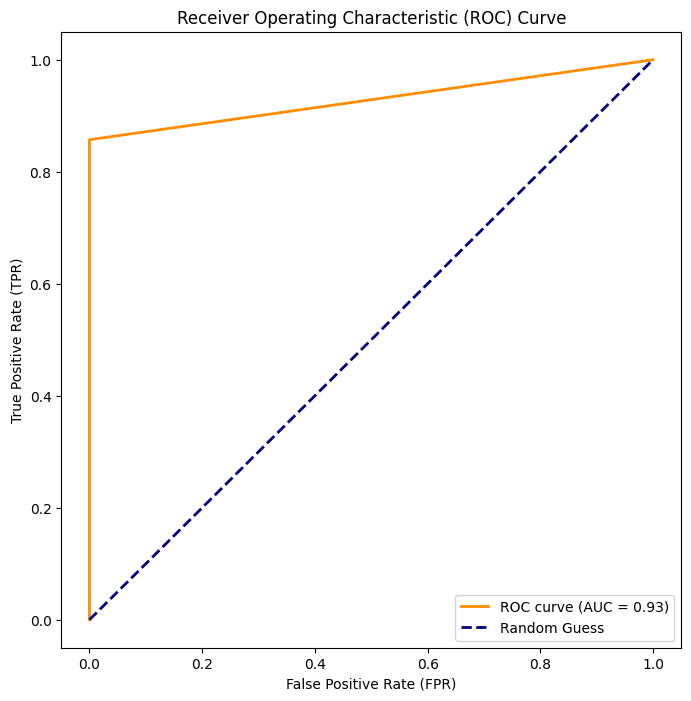

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         7

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



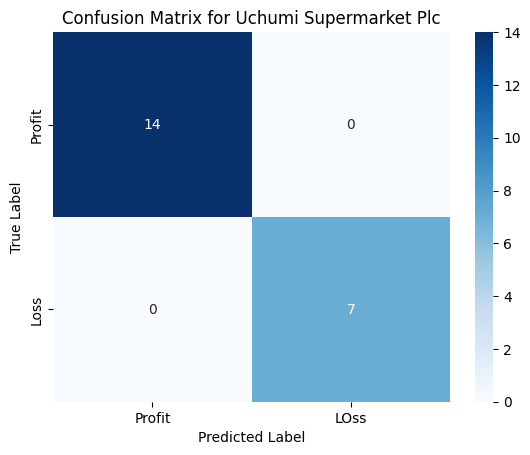

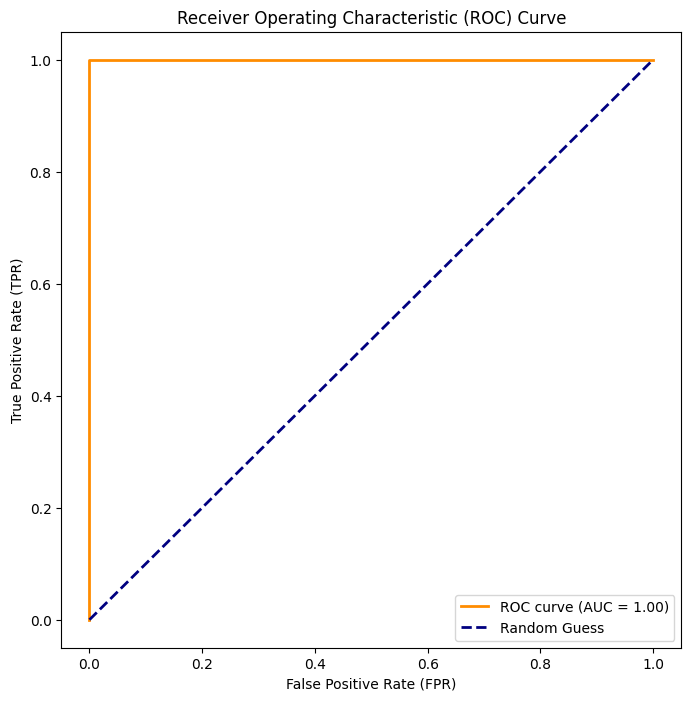

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



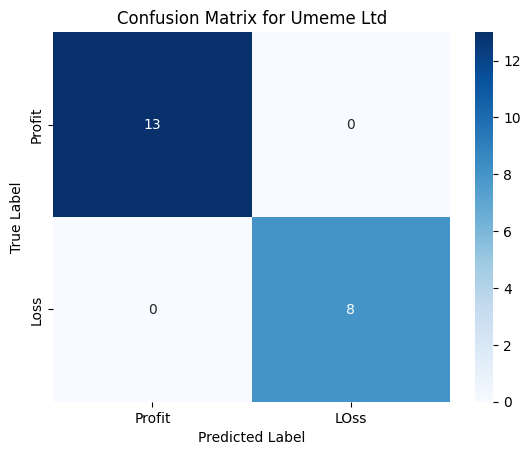

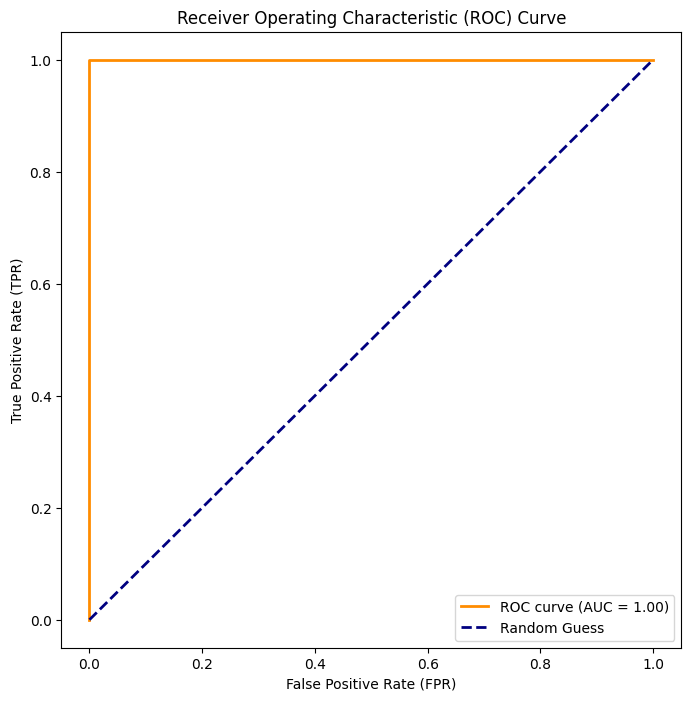

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



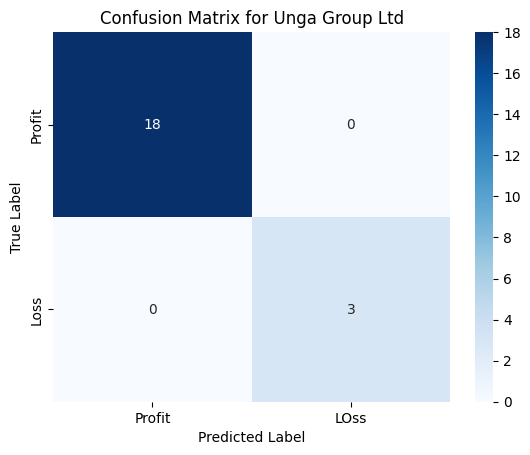

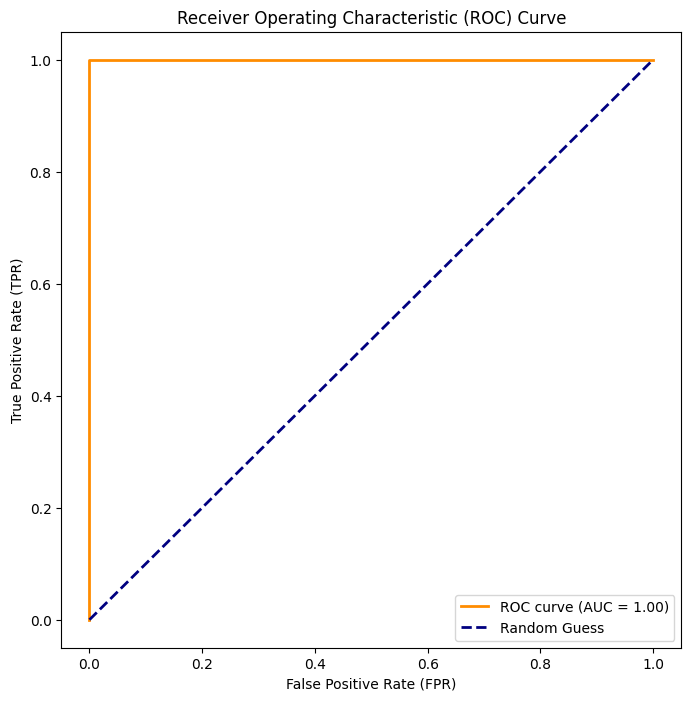

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



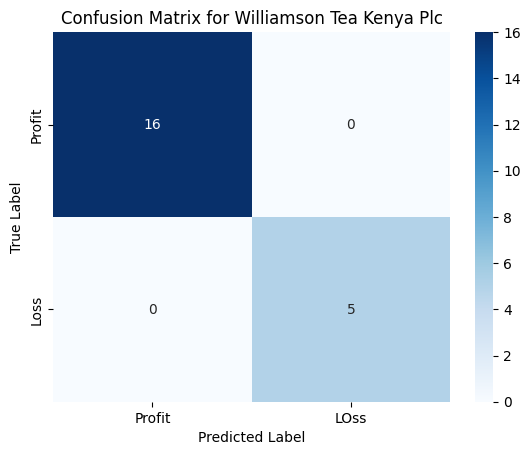

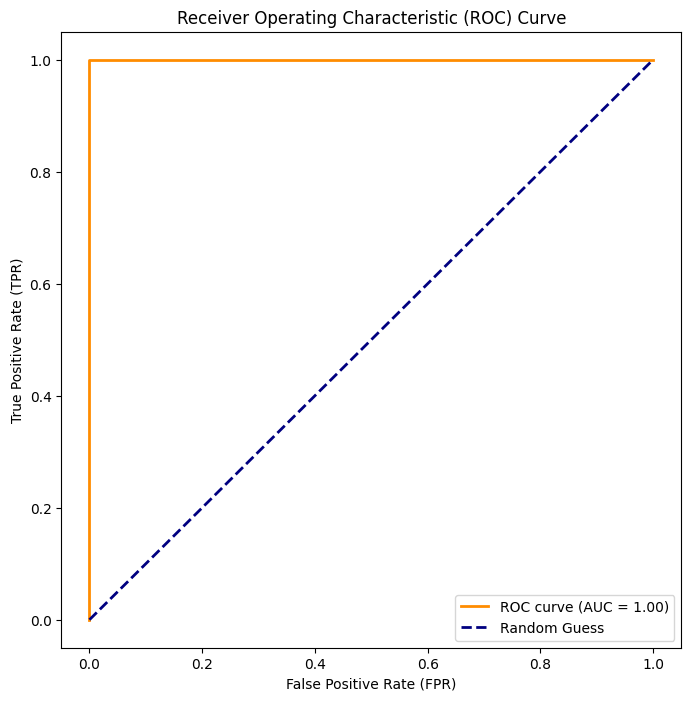

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.89      1.00      0.94         8

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



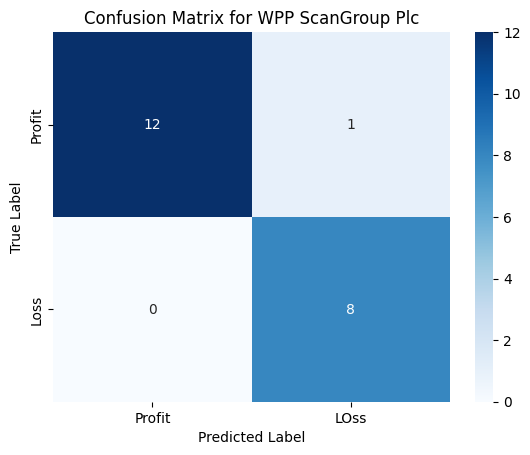

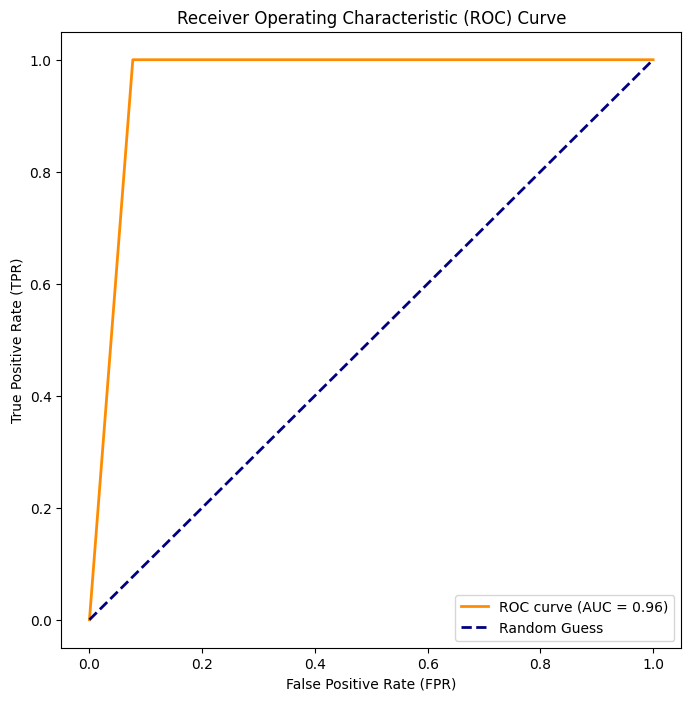

In [110]:
svm_accuracy=[]
stock_data['Change'] = pd.to_numeric(stock_data['Change'],errors='coerce')
stock_data['Change'].fillna(0, inplace=True)

for company in all_companies[60:]:
    company_stock_data = stock_data[stock_data['Name'] == company]

    # Features
    X = company_stock_data[['Previous','12m Low', '12m High', 'Day Low', 'Day High','Change']]
    y = company_stock_data['PriceMovement']


    # Split data into training and testing sets
    split = int(0.8 * len(company_stock_data))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]

   # Instantiate the SVM classifier
    svm_classifier = SVC(kernel='linear', C=1.0,class_weight='balanced')
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # Fit the model on the training data
    svm_classifier.fit(X_train, y_train)
    y_test = y_test.astype(int)

    # Make predictions on the testing data
    y_pred = svm_classifier.predict(X_test)

    # Evaluate Model Performance
    accuracy = accuracy_score(y_test, y_pred)
    svm_accuracy.append(accuracy)

    ## classification report
    print(classification_report(y_test, y_pred))

    ## confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Profit', 'LOss'], yticklabels=['Profit', 'Loss'])
    plt.title('Confusion Matrix for {comp}'.format(comp=company))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print("\n\n")

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

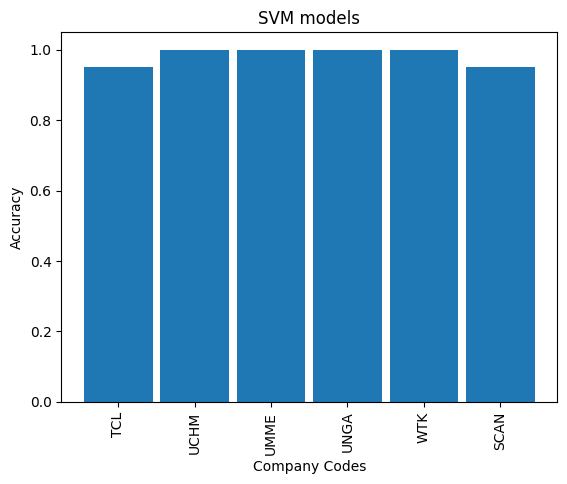

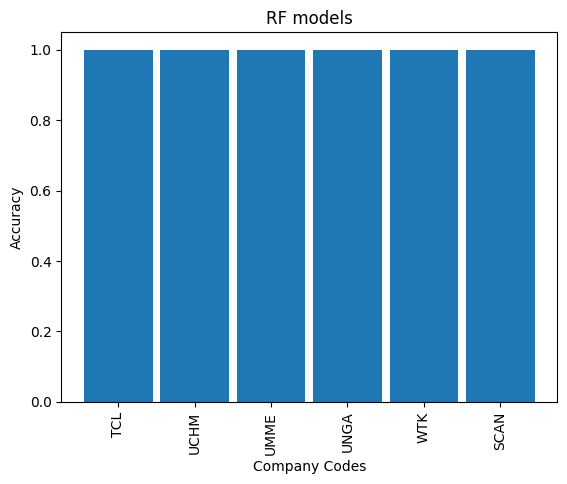

In [111]:

companies = stock_data['Code'].unique()[60:]
plt.bar(companies,svm_accuracy,width=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("Company Codes")
plt.ylabel("Accuracy")
plt.title("SVM models")
plt.show()

plt.bar(companies,rf_accuracy,width=0.9)
plt.xticks(rotation='vertical')
plt.xlabel("Company Codes")
plt.ylabel("Accuracy")
plt.title("RF models")
plt.show()

RandomForest outperformed SVM. Why?

Unlike SVMs, which 'work' alone, Random Forests function as a collective one. Each tree (individual model) within the forest analyzes the data and casts a vote. The final prediction reflects the votes of the majority, leading to potentially more robust and accurate results.

# Summary

This data-driven journey involved performing analysis on the NSE stock data. The dataset contains stock data of 66 companies over a period of five months. In our first act, we delve into the performance of the companies over the past 12 months. Our focus was on the '12m High' and '12m Low' features. We performed difference betwwn the two features. The shorter the difference, the more stable a company is. We obtained the top 10 and bottom 10 companies as per their difference.

In addition to the two featurs, we computed daily price flunctuation of the two groups(top 10 and bottom 10) using the 'Daily Low' and 'Daily High' features. The companies in the top_10 group, showed minimal flunctuations compared to the bottom_10 group. Therefore, companies with minimal daily price fluctuations might be more suitable for long-term investors seeking stability.

Moving forward, the "Change" column propelled our narrative. it reveals how each company's stock price has shifted compared to the previous day. Are there companies experiencing significant upward surges, potentially fueled by positive news or industry trends? Or are there others facing downward pressures, prompting further investigation?

We turned our focus to the importance of the 'Change' feature in stock data modelling. We trained two linear regression models. Model two was trained with the 'Change' feature. We observed that model two outperformed model two. This is because the 'Change' feature brings in 'memory' into our model improving the predictive ability of the model.

# Conclusion

This data-driven exploration of the NSE stock market yielded valuable insights for investors. We identified companies exhibiting stability over the past year by analyzing the difference between their "12m High" and "12m Low" values. Additionally, companies in this stable group displayed minimal daily price fluctuations compared to their more volatile counterparts. This suggests they might be well-suited for long-term investors seeking consistent returns.

Furthermore, the "Change" feature emerged as a crucial element for understanding stock price movements. By incorporating this feature into a linear regression model, we achieved superior predictive power compared to a model lacking it. This "memory" effect allows the model to not only analyze current prices but also consider the momentum of change from the previous day, leading to more accurate predictions.

In essence, this journey highlighted the importance of both historical stability and understanding price momentum for informed investment decisions.